1. Yolo v3 설치 및 학습하기

In [1]:
!git clone https://github.com/ultralytics/yolov3

# 코랩은 구글 서버컴퓨터를 쓰는 거고 패키지 등이 다 그 서버 컴퓨터에 있는 거겠지?
# yolov3 폴더를 만들고 다 다운 받았다
!cd yolov3;pip install -qr requirements.txt 

Cloning into 'yolov3'...
remote: Enumerating objects: 10058, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 10058 (delta 19), reused 28 (delta 13), pack-reused 10017
Receiving objects: 100% (10058/10058), 9.37 MiB | 32.40 MiB/s, done.
Resolving deltas: 100% (6778/6778), done.
     |████████████████████████████████| 1.6 MB 30.3 MB/s 


In [2]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [3]:
%cd yolov3

# --img라고 하면 train.py의 parse_opt함수를 보면 크기 조정을 일반화 할 수 있다
# data는 coco128이라는 파일로 학습을 할 거고 coco 야물 파일에 있다 -> 보면 
'''
parent : 데이터의 위치
class : 클래스 개수
down : 다운로드 링크까지 걸려있다
'''

# 연습용 파일이 아니라 내가 원하는 데이터로 하려면 어캐함? 한상범.yaml파일을 data 폴더에 만들어서 내 데이터로 모델을 학습 가능
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave # 이게 욜로를 학습시키는 파일/ 학습한 가중치 파일을 .pt로 저장함

/content/yolov3
train: weights=yolov3.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-27-gdd838e2 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s


2. YOLO 사용하기



(1) 이미지 Detection
* https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb
* detect.py를 python으로 직접 호출하여 수행 가능 
* python detect.py --source 0 # webcam
                            file.jpg #image
                            file.mp4 #video
                            path/ #directory path 밑에 있는 jpg 를 모두 변환
                            path/*.jpg #path 디렉토리 밑에 있는 jpg를 모두 변환
                            'https://youtu.be/NUsoVlDfqZq # Youtube video. CV UI가 필요함. Jupyter notebook 지원 안됨. 

In [ ]:
## --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함

# --img 숫자 : 이미지 사이즈를 조정함
# --conf 숫자 : 숫자 이상의 확률이 나타난 객체만 확정지음

!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

/bin/bash: line 0: cd: yolov3: No such file or directory
detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (0.050s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.045s)
Speed: 0.5ms pre-process, 47.7ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


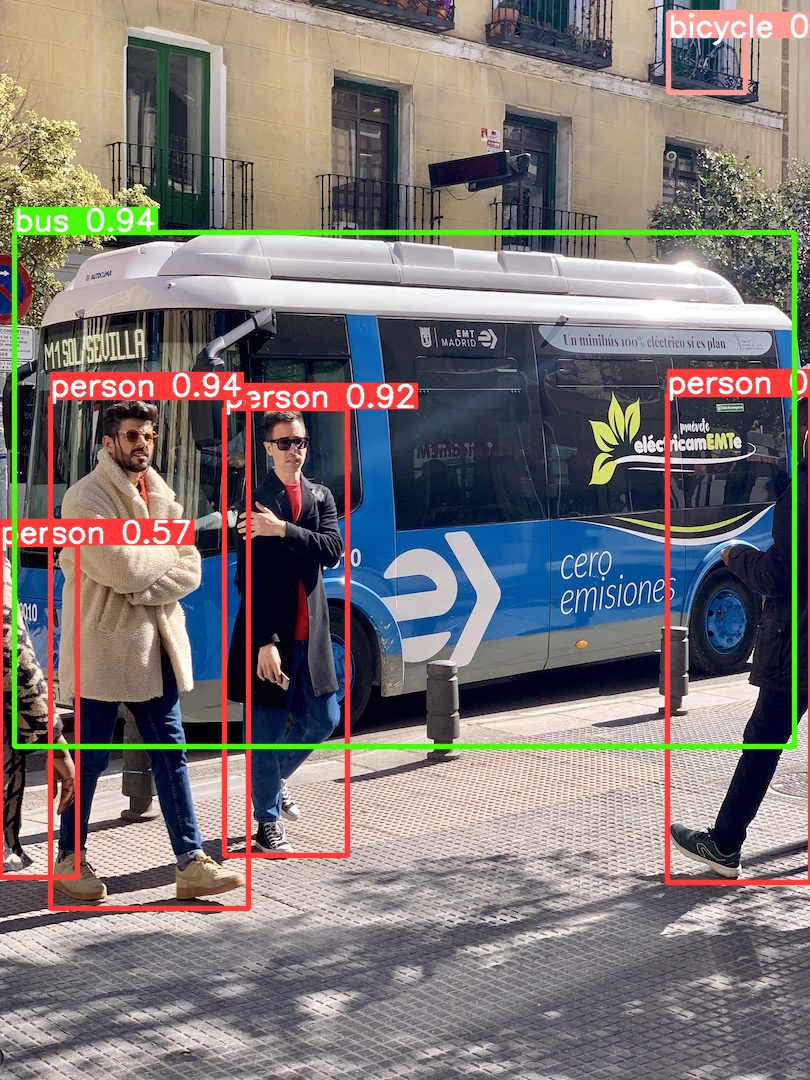

In [ ]:
from IPython.display import Image, clear_output 

Image(filename='runs/detect/exp/bus.jpg', width=600)

In [ ]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2022-07-12 05:59:46--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2022-07-12 05:59:46 (10.2 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [ ]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

/bin/bash: line 0: cd: yolov3: No such file or directory
detect: weights=['yolov3.pt'], source=/content/data/beatles01.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 11 cars, 1 truck, 1 handbag, Done. (0.050s)
Speed: 0.5ms pre-process, 50.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


(2) Video Detection
* detect.py의 source가 mp4이면 자동으로 Video Detection 수행. 

In [ ]:
# Night_Day_Chase.mp4 영상 다운로드 하기
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2022-07-12 05:59:59--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-07-12 05:59:59--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-07-12 05:59:59--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [ ]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장.  
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

/bin/bash: line 0: cd: yolov3: No such file or directory
detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.040s)
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.039s)
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.039s)
video 1/1 (4/1383) /content/data/Night_Day_Ch

In [ ]:
# ##Youtube의 경우는 UI 문제로 변환되지 않음. UI가 지원되는 OS에서 적용 필요. 
# ##colab에서는 구현할 수 없으며, 리눅스 OS에서만 유튜브 영상을 링크로 불러와 작동시킬 수 있음
# !cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source https://youtu.be/zbvx7pqw5Gg